# Deep Learning and Image Recognition

## Word2Vec

Word2vec is a two-layer neural net that  method to processes text. It turns text into a numerical form that deep nets can understand. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus. Word2vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text. 

Word2vec Tutorial: https://www.tensorflow.org/tutorials/word2vec/

<img width="80%" src="https://www.tensorflow.org/images/linear-relationships.png" />


In [1]:
#nltk.download()
import nltk
nltk.download('brown')
nltk.download('movie_reviews')

[nltk_data] Downloading package brown to /Users/sshepa74/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sshepa74/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [2]:
#import statements
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy

In [3]:
#word2vec on multiple datasets 
b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())

### Word Vectors

In [4]:
mr.wv['computer']

array([ 0.8218187 ,  0.27358755, -1.1335104 , -0.05315157,  0.77383417,
        0.4824191 ,  0.43056038, -0.19869886,  0.9587905 , -0.71970075,
        0.30696654,  0.52233213,  0.20720413, -0.46696684, -0.3858332 ,
       -0.4476963 ,  0.24341127,  0.21797572,  0.00944064, -0.6608064 ,
        0.04605692, -0.08013335,  0.2651406 , -0.35178104,  0.28340915,
       -0.37007606,  0.5741145 ,  0.07696178, -0.59361404,  0.7223392 ,
        0.15574163,  0.7140621 , -0.08248562,  0.34367692, -0.21697839,
        0.20614675, -0.7482678 ,  0.14949848, -0.7590831 , -0.48387212,
        0.04237223,  0.41388437, -0.19405381,  0.16500993,  0.33643174,
        0.36312523, -0.5555052 ,  0.40589416, -0.28832114,  0.01128159,
       -0.02151897, -0.64871496,  0.10455965, -0.25602847, -0.31217083,
       -0.13908388, -0.25577843,  0.2786047 , -0.3488694 ,  0.14208327,
        0.27144635,  0.17558166, -0.04902564, -0.56978595, -0.25616813,
       -0.35867554,  0.1594419 , -0.22295755,  0.30655095,  0.04

In [5]:
b.wv['computer']

array([ 0.23928158,  0.07497329, -0.06154577,  0.10009626,  0.05826596,
        0.0225339 ,  0.00760393, -0.00772914, -0.00497579, -0.07799544,
       -0.05654044,  0.05593137, -0.084364  , -0.01414873, -0.13103327,
        0.01511255, -0.04205976, -0.10266966,  0.14481427, -0.00886015,
        0.12045785, -0.11295503,  0.08973382, -0.05246987, -0.12881735,
       -0.00233407, -0.0410257 , -0.06471788,  0.03578185,  0.02924736,
        0.08341258,  0.0687089 ,  0.07494289,  0.04320354, -0.03187212,
        0.02363884,  0.02077354, -0.06508917, -0.11524303, -0.02201077,
        0.04955157,  0.03892069, -0.0544645 , -0.02183673,  0.06416903,
        0.11804624,  0.02100626, -0.03685672, -0.03509818,  0.00938417,
        0.11322631, -0.01521472,  0.01461481,  0.12724298,  0.09293424,
        0.08201236,  0.0458689 ,  0.04489318, -0.05345949,  0.00558637,
        0.14050452,  0.14838918, -0.07177054, -0.01643893,  0.06505708,
       -0.00726636,  0.02124815, -0.03193378, -0.01544948,  0.03

### Similar words

In [6]:
b.wv.most_similar('great', topn=5)

[('common', 0.8673171997070312),
 ('experience', 0.8554660677909851),
 ('limited', 0.8106957674026489),
 ('part', 0.7990412712097168),
 ('sense', 0.7929390668869019)]

In [8]:
b.wv.most_similar('movie', topn=5)

[('Queen', 0.9589834809303284),
 ('Faith', 0.9588415622711182),
 ('seasonal', 0.9552385807037354),
 ('Greenwich', 0.9552229642868042),
 ('vigorous', 0.9540851712226868)]

In [9]:
mr.wv.most_similar('drama', topn=5)

[('adventure', 0.8557540774345398),
 ('suspense', 0.8522096872329712),
 ('thriller', 0.8496826887130737),
 ('concept', 0.8300132155418396),
 ('comedy', 0.8290078639984131)]

In [10]:
mr.wv.most_similar('money', topn=5)

[('him', 0.7676533460617065),
 ('chance', 0.7635945677757263),
 ('home', 0.7592153549194336),
 ('attention', 0.7393094301223755),
 ('eyes', 0.7314083576202393)]

### Odd word 

In [11]:
mr.wv.doesnt_match(["movie","action","drama","comedy"])

/Users/sshepa74/code/scottshepard/MScA/venv3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'movie'

In [12]:
mr.wv.doesnt_match(["breakfast", "cereal", "dinner","lunch"])

'dinner'

In [13]:
b.wv.doesnt_match(["breakfast", "cereal", "dinner","lunch"])

'cereal'

### Distance between words

In [14]:
def distance(word1, word2):
    return numpy.linalg.norm(mr.wv[word1]-mr.wv[word2])

In [15]:
distance('computer','tv')

5.3632383

In [16]:
distance('computer','radio')

4.1018295

In [17]:
distance('computer','phone')

4.124088

In [18]:
distance('computer','man')

9.345594

### Visualize Word Embeddings

[[-0.01378544 -0.5943162 ]
 [ 1.4284353   0.23158598]
 [-0.64375156  0.3827999 ]
 [-0.22610149  0.7300187 ]
 [ 0.22685611 -0.16388127]
 [-0.16585411 -0.61860335]
 [-0.27052352  0.27688572]
 [-0.33527583 -0.24448933]]


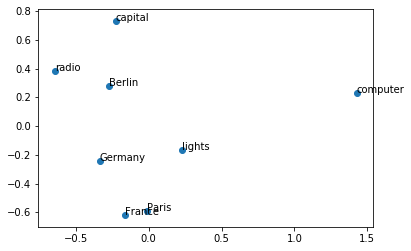

In [19]:
# define training data
words = ['Paris', 'computer', 'radio', 'capital', 'lights', 'France', 'Berlin', 'Germany']

# use model
model = b

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv[words])

print(result)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()